# Visualization in Python - Case Study

There are many python packages for visualization. We'll focus on capabilities available through pandas, and to a lesser extent, matplotlib. There is great documentation on all of this.
The case study is to analyze the flow of bicycles out of stations in the Pronto trip data.
In this section, we'll discuss:
- the structure of a matplotlib plot
- different plot idioms
- doing multiple plots

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# The following ensures that the plots are in the notebook
%matplotlib inline
# We'll also use capabilities in numpy
import numpy as np

Analysis questions
- Which stations have the biggest difference between in-flow and out-flow of bikes?
- Where can we localize the movement of bicycles between stations that are in close proximity?

## Preparing Data For Plotting

In [2]:
df = pd.read_csv("2015_trip_data.csv")
df.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,431,10/13/2014 10:31,10/13/2014 10:48,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Male,1960
1,432,10/13/2014 10:32,10/13/2014 10:48,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Male,1970
2,433,10/13/2014 10:33,10/13/2014 10:48,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Female,1988
3,434,10/13/2014 10:34,10/13/2014 10:48,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Female,1977
4,435,10/13/2014 10:34,10/13/2014 10:49,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Male,1971


Now let's consider the flow of bicycles from and to stations.

In [3]:
from_counts = pd.value_counts(df.from_station_id)
to_counts = pd.value_counts(df.to_station_id)

## Simple Plots for Series

Let's address the question "Which stations have the biggest difference between the in-flow and out-flow of bicycles?"

What kind of objects are returned from pd.value_counts? Are these plottable? How do we figure this out?

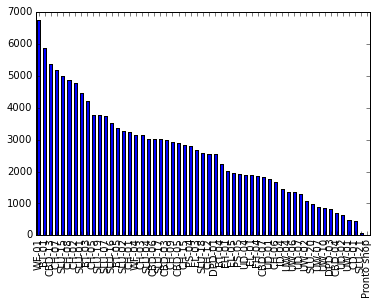

In [4]:
from_counts.plot.bar()

But this plot doesn't tell us about the *difference* between "from" and "to" counts. We want to subtract to_counts from from_counts. Will this difference be plottable?

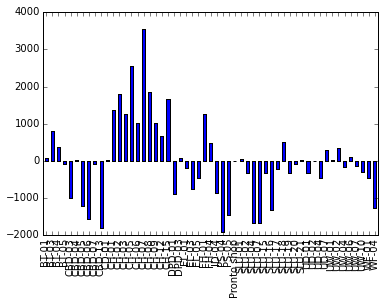

In [5]:
(from_counts-to_counts).plot.bar()

Some issues:
- Bogus value 'Pronto shop'
- Difficult to read the labels on the x-axis
- The x and y axis aren't labelled
- Lost information about "from" and "to"

## Writing a Data Cleansing Function

We want to get rid of the row 'Pronto shop' in both from_counts and to_counts.

In [6]:
# Selecting a row
from_counts[from_counts.index == 'Pronto shop']

Pronto shop    1
Name: from_station_id, dtype: int64

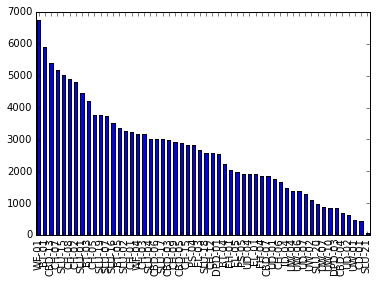

In [7]:
# Deleting a row
new_from_counts = from_counts[from_counts.index != 'Pronto shop']
new_from_counts.plot.bar()

In [8]:
def clean_rows(df, indexes):
    """
    Removes from df all rows with the specified indexes
    :param pd.DataFrame or pd.Series df:
    :param list-of-str indexes
    :return pd.DataFrame or pd.Series:
    """
    for idx in indexes:
        df = df[df.index != idx]
    return df

Does clean_rows need to return df to effect the change in df?

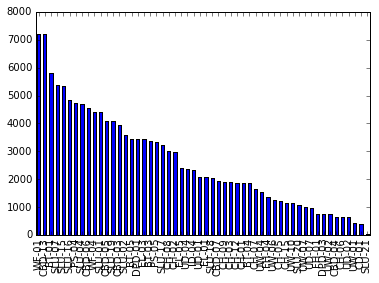

In [9]:
to_counts = clean_rows(to_counts, ['Pronto shop'])
to_counts.plot.bar()

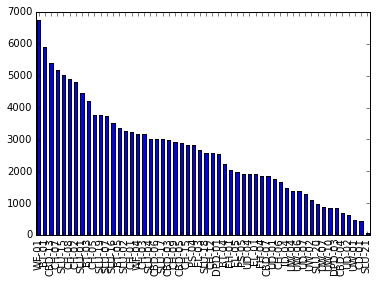

In [10]:
from_counts = clean_rows(from_counts, ['Pronto shop'])
from_counts.plot.bar()

## Getting More Control Over Plots

*Let's take a more detailed approach to plotting so we can better control what gets rendered.*

In this section, we show how to control various elements of plots to produce a desired visualization. We'll use the package matplotlib, a python package that is modelled after MATLAB style plotting.

Make a dataframe out of the count data.

In [11]:
counts_df = pd.DataFrame({'From': from_counts.sort_index(), 'To': to_counts.sort_index()})

Need to align the counts by the station. Do we do this?

In [12]:
counts_df

,From,To
BT-01,5885,5800
BT-03,4199,3386
BT-04,2221,1856
BT-05,3368,3459
CBD-03,2974,3959
CBD-04,690,654
CBD-05,2897,4103
CBD-06,3010,4567
CBD-07,1838,1933
CBD-13,5385,7189


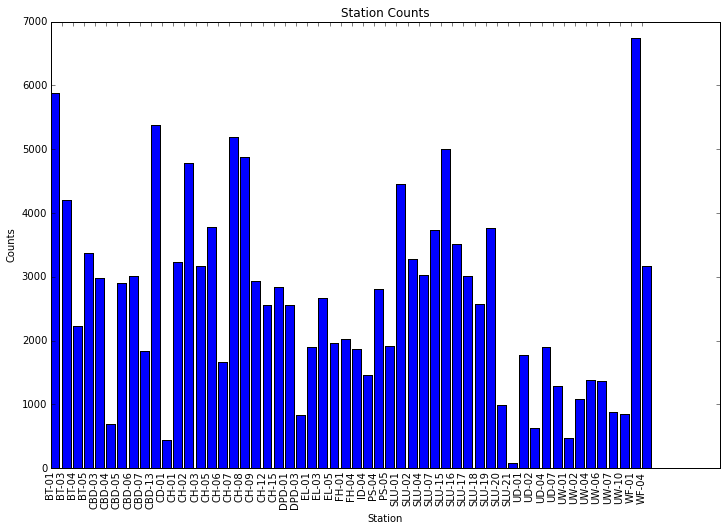

In [13]:
"""
Basic bar chart using matplotlib
"""
import numpy as np
import matplotlib.pyplot as plt


n_groups = len(counts_df.index)
index = np.arange(n_groups)  # The "raw" x-axis of the bar plot

fig = plt.figure(figsize=(12, 8))  # Controls global properties of the bar plot
rects1 = plt.bar(index, counts_df.From)
plt.xlabel('Station')
plt.ylabel('Counts')
plt.xticks(index, counts_df.index)  # Convert "raw" x-axis into labels
_, labels = plt.xticks()  # Get the new labels of the plot
plt.setp(labels, rotation=90)  # Rotate labels to make them readable
plt.title('Station Counts')
plt.show()

## Comparing Two Variables in a Bar Chart

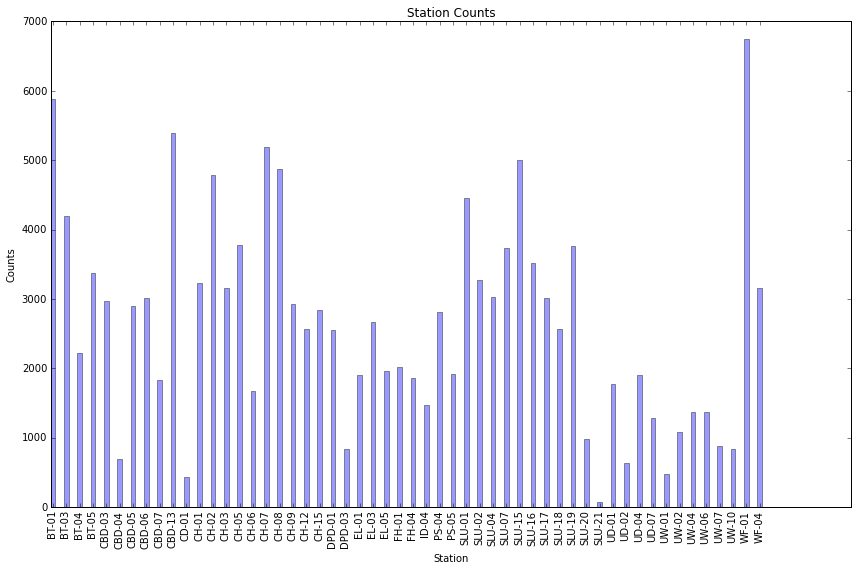

In [21]:
"""
Basic bar chart using matplotlib
"""
import numpy as np
import matplotlib.pyplot as plt

n_groups = len(counts_df.index)  # Counts the number of items
index = np.arange(n_groups)  # The x-axis of the bar plot
fig = plt.figure(figsize=(12,8))  # Figure object
bar_width = 0.35  # Width of the bars
opacity = 0.4  # How transparent the bars are
rects1 = plt.bar(index, counts_df.From, bar_width,
                 alpha=opacity,
                 color='b',
                 label='From')


plt.xlabel('Station')
plt.ylabel('Counts')
plt.title('Station Counts')
plt.xticks(index + bar_width / 2, counts_df.index)
_, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
"""
Bar chart demo with pairs of bars grouped for easy comparison.
"""

n_groups = 5

means_men = (20, 35, 30, 35, 27)
std_men = (2, 3, 4, 1, 2)

means_women = (25, 32, 34, 20, 25)
std_women = (3, 5, 2, 3, 3)

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = plt.bar(index, means_men, bar_width,
                 alpha=opacity,
                 color='b',
                 yerr=std_men,
                 error_kw=error_config,
                 label='Men')

rects2 = plt.bar(index + bar_width, means_women, bar_width,
                 alpha=opacity,
                 color='r',
                 yerr=std_women,
                 error_kw=error_config,
                 label='Women')

plt.xlabel('Group')
plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(index + bar_width / 2, ('A', 'B', 'C', 'D', 'E'))
plt.legend()

plt.tight_layout()
plt.show()


## In-class exercise
- Using the pronto data, explore comparisons & trends in # rides by time of day, day of week, station, month, membership, gender
- What idioms work best for the different kinds of trends

Work in teams of three
- One person in the team will give a 2 minute summary at end of class